In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl

import files 

In [2]:
ACPT= pd.read_csv(r'data\AdmissionsCorePopulatedTable.csv')
PCPT= pd.read_csv(r'data\PatientCorePopulatedTable.csv')
ADCPT= pd.read_csv(r'data\AdmissionsDiagnosesCorePopulatedTable.csv')
LCPT= pd.read_csv(r'data\LabsCorePopulatedTable.csv')
ACPT['AdmissionStartDate']= pd.to_datetime(ACPT['AdmissionStartDate'])
ACPT['AdmissionEndDate']= pd.to_datetime(ACPT['AdmissionEndDate'])
ACPT['Duration']=ACPT['AdmissionEndDate']-ACPT['AdmissionStartDate']

read csv 
calculate stay duration by converting into datetime

In [3]:
ACPT.sort_values(['PatientID','AdmissionID'], axis = 0, ascending = True, inplace = True, na_position ='last')
PC = ACPT.groupby(by='PatientID', as_index=False).agg({'AdmissionID': pd.Series.nunique})
ACPT=ACPT.reset_index()
start=ACPT['AdmissionStartDate']
end=ACPT['AdmissionEndDate']
start=start.reset_index()
end=end.reset_index()

In [4]:
def Insert_row(row_number, df, row_value):
    start_upper = 0
    end_upper = row_number 
    start_lower = row_number 
    end_lower = df.shape[0] 
    upper_half = [*range(start_upper, end_upper, 1)] 
    lower_half = [*range(start_lower, end_lower, 1)] 
    lower_half = [x.__add__(1) for x in lower_half]
    index_ = upper_half + lower_half 
    df.index = index_ 
    df.loc[row_number] = row_value 
    df = df.sort_index()
    return df 

function to insert row in new dataframe

In [5]:
def diff2(start, end, arr):
    s=len(start)
    e=len(end)
    arrlen=len(arr)
    k=0;
    ReAd= pd.DataFrame()
    ReAd[0]="ReAdmission Duration"
    for i in arr:
        for j in range (k,k+i):
            if(j==k+i-1):
                diff1=pd.to_timedelta('-1 days 00:00:00')
                ReAd=Insert_row(j,ReAd,diff1)
                break;
            elif(j<len(start)):
                diff1=start[j+1]-end[j]
                ReAd=Insert_row(j,ReAd,diff1)
        k=k+i;
    return ReAd

function to calculate readmission duration

In [6]:
ReAd=diff2(start['AdmissionStartDate'],end['AdmissionEndDate'],PC['AdmissionID'])

call function

In [7]:
ACPT['ReAdDuration']=ReAd

get Readmission duartion

In [8]:
arrn=[]
for i in range (0,372):
    arrn.append(ACPT.iloc[i,6].days)
ACPT['READMISSION']=arrn

convert ReAd days into integer

In [9]:
arrn2=[]
for i in range (0,372):
    arrn2.append(ACPT.iloc[i,5].days)
ACPT['STAYDURATION']=arrn2

convert stay days into integer 

In [10]:
ACPT['READ'] = [True if (x <=600 and x!=-1) else False for x in ACPT['READMISSION']] 

Categorize true or false based on days <600 

In [11]:
ADCPT.sort_values(['PatientID','AdmissionID'], axis = 0, ascending = True, inplace = True, na_position ='last')
PCPT.sort_values('PatientID', axis = 0, ascending = True, inplace = True, na_position ='last')
newACPT=ACPT.copy()
newADCPT=ADCPT.copy()
newACPT.reset_index()
newADCPT.reset_index()
FADCPT=pd.merge(ACPT,ADCPT,on=['PatientID','AdmissionID'])

merge two dfs after sorting

In [12]:
FADCPT1=pd.merge(PCPT,FADCPT,on='PatientID')

get into new df

In [13]:
FADCPT1

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,index,AdmissionID,AdmissionStartDate,AdmissionEndDate,Duration,ReAdDuration,READMISSION,STAYDURATION,READ,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,016A590E-D093-4667-A5DA-D68EA6987D93,Male,12/6/1960,White,Unknown,English,15.02,271,1,1986-11-30,1986-12-06,6 days,4198 days,4198,6,False,O99.712,Diseases of the skin and subcutaneous tissue c...
1,016A590E-D093-4667-A5DA-D68EA6987D93,Male,12/6/1960,White,Unknown,English,15.02,272,2,1998-06-04,1998-06-11,7 days,504 days,504,7,True,E11.64,Type 2 diabetes mellitus with hypoglycemia
2,016A590E-D093-4667-A5DA-D68EA6987D93,Male,12/6/1960,White,Unknown,English,15.02,273,3,1999-10-28,1999-11-09,12 days,495 days,495,12,True,I25.812,Atherosclerosis of bypass graft of coronary ar...
3,016A590E-D093-4667-A5DA-D68EA6987D93,Male,12/6/1960,White,Unknown,English,15.02,274,4,2001-03-18,2001-03-27,9 days,2523 days,2523,9,False,O24.1,"Pre-existing diabetes mellitus, type 2, in pre..."
4,016A590E-D093-4667-A5DA-D68EA6987D93,Male,12/6/1960,White,Unknown,English,15.02,275,5,2008-02-22,2008-03-03,10 days,-1 days,-1,10,False,F13.151,"Sedative, hypnotic or anxiolytic abuse with se..."
5,03A481F5-B32A-4A91-BD42-43EB78FEBA77,Female,2/7/1968,Asian,Single,Unknown,93.23,77,1,1988-11-25,1988-12-01,6 days,7019 days,7019,6,False,C94.22,"Acute megakaryoblastic leukemia, in relapse"
6,03A481F5-B32A-4A91-BD42-43EB78FEBA77,Female,2/7/1968,Asian,Single,Unknown,93.23,78,2,2008-02-19,2008-03-05,15 days,-1 days,-1,15,False,A48.2,Nonpneumonic Legionnaires' disease [Pontiac fe...
7,0681FA35-A794-4684-97BD-00B88370DB41,Female,10/2/1978,Asian,Unknown,Spanish,19.16,10,1,1998-06-21,1998-07-09,18 days,4503 days,4503,18,False,C92.51,"Acute myelomonocytic leukemia, in remission"
8,0681FA35-A794-4684-97BD-00B88370DB41,Female,10/2/1978,Asian,Unknown,Spanish,19.16,11,2,2010-11-06,2010-11-21,15 days,-1 days,-1,15,False,M02.38,"Reiter's disease, vertebrae"
9,0A9BA3E4-CF3C-49C4-9774-5EEA2EE7D123,Male,4/4/1980,White,Single,Spanish,14.28,157,1,2007-03-06,2007-03-23,17 days,1076 days,1076,17,False,F31.4,"Bipolar disorder, current episode depressed, s..."


print new df

In [14]:
FADCPT1['PatientDateOfBirth']= pd.to_datetime(FADCPT1['PatientDateOfBirth'])
FADCPT1['Age']=FADCPT1['AdmissionStartDate']-FADCPT1['PatientDateOfBirth']
arr=[]
for i in range(len(FADCPT1)):
    arr.append(FADCPT1.iloc[i,18].days)
arr
arr2=[]
for i in arr:
    arr2.append(i/(12*30))
arr2
FADCPT1['Age2']=arr2

calculate age by AdmissionStartDate - DOB and convert into number of years

In [15]:
FADCPT1['Age2']=FADCPT1['Age2'].astype(int)

In [16]:
FADCPT1['Age2']

0      26
1      38
2      39
3      40
4      47
5      21
6      40
7      20
8      32
9      27
10     30
11     20
12     88
13     28
14     60
15     66
16     19
17     22
18     22
19     30
20     31
21     36
22     39
23     26
24     42
25     75
26     26
27     26
28     43
29     57
       ..
342    81
343    26
344    38
345    43
346    52
347    26
348    51
349    18
350    46
351    52
352    53
353    57
354    62
355    20
356    23
357    72
358    75
359    79
360    21
361    26
362    62
363    19
364    65
365    68
366    23
367    41
368    55
369    27
370    59
371    72
Name: Age2, Length: 372, dtype: int32

In [17]:
FADCPT1.head(20)

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,index,AdmissionID,AdmissionStartDate,AdmissionEndDate,Duration,ReAdDuration,READMISSION,STAYDURATION,READ,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,Age,Age2
0,016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06,White,Unknown,English,15.02,271,1,1986-11-30,1986-12-06,6 days,4198 days,4198,6,False,O99.712,Diseases of the skin and subcutaneous tissue c...,9490 days,26
1,016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06,White,Unknown,English,15.02,272,2,1998-06-04,1998-06-11,7 days,504 days,504,7,True,E11.64,Type 2 diabetes mellitus with hypoglycemia,13694 days,38
2,016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06,White,Unknown,English,15.02,273,3,1999-10-28,1999-11-09,12 days,495 days,495,12,True,I25.812,Atherosclerosis of bypass graft of coronary ar...,14205 days,39
3,016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06,White,Unknown,English,15.02,274,4,2001-03-18,2001-03-27,9 days,2523 days,2523,9,False,O24.1,"Pre-existing diabetes mellitus, type 2, in pre...",14712 days,40
4,016A590E-D093-4667-A5DA-D68EA6987D93,Male,1960-12-06,White,Unknown,English,15.02,275,5,2008-02-22,2008-03-03,10 days,-1 days,-1,10,False,F13.151,"Sedative, hypnotic or anxiolytic abuse with se...",17244 days,47
5,03A481F5-B32A-4A91-BD42-43EB78FEBA77,Female,1968-02-07,Asian,Single,Unknown,93.23,77,1,1988-11-25,1988-12-01,6 days,7019 days,7019,6,False,C94.22,"Acute megakaryoblastic leukemia, in relapse",7597 days,21
6,03A481F5-B32A-4A91-BD42-43EB78FEBA77,Female,1968-02-07,Asian,Single,Unknown,93.23,78,2,2008-02-19,2008-03-05,15 days,-1 days,-1,15,False,A48.2,Nonpneumonic Legionnaires' disease [Pontiac fe...,14622 days,40
7,0681FA35-A794-4684-97BD-00B88370DB41,Female,1978-10-02,Asian,Unknown,Spanish,19.16,10,1,1998-06-21,1998-07-09,18 days,4503 days,4503,18,False,C92.51,"Acute myelomonocytic leukemia, in remission",7202 days,20
8,0681FA35-A794-4684-97BD-00B88370DB41,Female,1978-10-02,Asian,Unknown,Spanish,19.16,11,2,2010-11-06,2010-11-21,15 days,-1 days,-1,15,False,M02.38,"Reiter's disease, vertebrae",11723 days,32
9,0A9BA3E4-CF3C-49C4-9774-5EEA2EE7D123,Male,1980-04-04,White,Single,Spanish,14.28,157,1,2007-03-06,2007-03-23,17 days,1076 days,1076,17,False,F31.4,"Bipolar disorder, current episode depressed, s...",9832 days,27


Cheers!

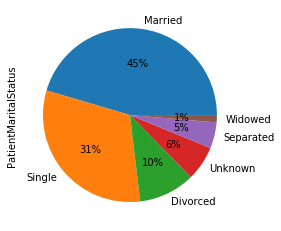

In [18]:
%matplotlib inline
FADCPT1.PatientMaritalStatus.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [19]:
LCPT.sort_values(['PatientID','AdmissionID','LabName'], axis = 0, ascending = True, inplace = True, na_position ='last')

In [20]:
LCPT

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
24562,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,34.1,%,12/1/1986
24604,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,16.3,%,12/3/1986
24654,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,17.2,%,12/4/1986
24676,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,16.6,%,12/5/1986
24566,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,67.5,%,11/30/1986
24601,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,61.4,%,12/3/1986
24650,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,77.4,%,12/4/1986
24680,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,70.9,%,12/5/1986
24578,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: BASOPHILS,0.1,k/cumm,12/2/1986
24594,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: BASOPHILS,0.1,k/cumm,12/3/1986


In [21]:
LCPT['LabDateTime']= pd.to_datetime(LCPT['LabDateTime'])

In [22]:
LCPT.reset_index()

,index,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,24562,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,34.1,%,1986-12-01
1,24604,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,16.3,%,1986-12-03
2,24654,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,17.2,%,1986-12-04
3,24676,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,16.6,%,1986-12-05
4,24566,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,67.5,%,1986-11-30
5,24601,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,61.4,%,1986-12-03
6,24650,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,77.4,%,1986-12-04
7,24680,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,70.9,%,1986-12-05
8,24578,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: BASOPHILS,0.1,k/cumm,1986-12-02
9,24594,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: BASOPHILS,0.1,k/cumm,1986-12-03


In [23]:
LCPT.head(300)

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
24562,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,34.1,%,1986-12-01
24604,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,16.3,%,1986-12-03
24654,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,17.2,%,1986-12-04
24676,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE LYMPHOCYTES,16.6,%,1986-12-05
24566,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,67.5,%,1986-11-30
24601,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,61.4,%,1986-12-03
24650,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,77.4,%,1986-12-04
24680,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: ABSOLUTE NEUTROPHILS,70.9,%,1986-12-05
24578,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: BASOPHILS,0.1,k/cumm,1986-12-02
24594,016A590E-D093-4667-A5DA-D68EA6987D93,1,CBC: BASOPHILS,0.1,k/cumm,1986-12-03


In [24]:
LCPT.LabName.value_counts()

CBC: NEUTROPHILS                 3224
URINALYSIS: WHITE BLOOD CELLS    3218
METABOLIC: CARBON DIOXIDE        3218
CBC: HEMATOCRIT                  3211
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: SODIUM                3207
METABOLIC: ALBUMIN               3202
METABOLIC: GLUCOSE               3202
CBC: MCHC                        3202
METABOLIC: CREATININE            3193
CBC: HEMOGLOBIN                  3193
CBC: MCH                         3191
CBC: EOSINOPHILS                 3191
METABOLIC: CHLORIDE              3190
CBC: RDW                         3188
URINALYSIS: RED BLOOD CELLS      3187
URINALYSIS: PH                   3187
METABOLIC: POTASSIUM             3185
METABOLIC: BILI TOTAL            3182
URINALYSIS: SPECIFIC GRAVITY     3181
METABOLIC: AST/SGOT              3179
METABOLIC: CALCIUM               3179
CBC: PLATELET COUNT              3177
METABOLIC: TOTAL PROTEIN         3177
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC: RED BLO

In [25]:
NR= pd.read_csv(r'data\range.csv')

In [26]:
NR

,DATASET,VARIABLE,DESCRIPTION,DATA TYPE,REFERENCE RANGE,UNITS
0,Lab_tests,SID,Unique Subject Identifier,character,NaN,NaN
1,Lab_tests,DATEBCOL,Blood collection date in format of mm/dd/yy,character,NaN,NaN
2,Lab_tests,TIMEBCOL,Blood collection time in format of HH:MM,character,NaN,NaN
3,Lab_tests,DATEUCOL,Urine collection date in format of mm/dd/yy,character,NaN,NaN
4,Lab_tests,TIMEUCOL,Urine collection time in format of HH:MM,character,NaN,NaN
5,Lab_tests,WBC,CBC: WHITE BLOOD CELL COUNT,numeric,5.0-10.0,k/cumm
6,Lab_tests,WBCF,CBC: ABNORMAL WHITE BLOOD COUNT,character,NaN,NaN
7,Lab_tests,RBC,CBC: RED BLOOD CELL COUNT,numeric,4.00-6.00,m/cumm
8,Lab_tests,RBCF,CBC: ABNORMAL RBC COUNT,character,NaN,NaN
9,Lab_tests,HGB,CBC: HEMOGLOBIN,numeric,12.0-16.0,gm/dl


In [27]:
NR.columns = NR.columns.str.replace(' ', '')

In [28]:
NR

,DATASET,VARIABLE,DESCRIPTION,DATATYPE,REFERENCERANGE,UNITS
0,Lab_tests,SID,Unique Subject Identifier,character,NaN,NaN
1,Lab_tests,DATEBCOL,Blood collection date in format of mm/dd/yy,character,NaN,NaN
2,Lab_tests,TIMEBCOL,Blood collection time in format of HH:MM,character,NaN,NaN
3,Lab_tests,DATEUCOL,Urine collection date in format of mm/dd/yy,character,NaN,NaN
4,Lab_tests,TIMEUCOL,Urine collection time in format of HH:MM,character,NaN,NaN
5,Lab_tests,WBC,CBC: WHITE BLOOD CELL COUNT,numeric,5.0-10.0,k/cumm
6,Lab_tests,WBCF,CBC: ABNORMAL WHITE BLOOD COUNT,character,NaN,NaN
7,Lab_tests,RBC,CBC: RED BLOOD CELL COUNT,numeric,4.00-6.00,m/cumm
8,Lab_tests,RBCF,CBC: ABNORMAL RBC COUNT,character,NaN,NaN
9,Lab_tests,HGB,CBC: HEMOGLOBIN,numeric,12.0-16.0,gm/dl


In [29]:
NR.dropna(subset=['REFERENCERANGE'], inplace=True)

In [30]:
NR.drop([35],axis=0,inplace=True)

In [31]:
NR

,DATASET,VARIABLE,DESCRIPTION,DATATYPE,REFERENCERANGE,UNITS
5,Lab_tests,WBC,CBC: WHITE BLOOD CELL COUNT,numeric,5.0-10.0,k/cumm
7,Lab_tests,RBC,CBC: RED BLOOD CELL COUNT,numeric,4.00-6.00,m/cumm
9,Lab_tests,HGB,CBC: HEMOGLOBIN,numeric,12.0-16.0,gm/dl
11,Lab_tests,HCT,CBC: HEMATOCRIT,numeric,35.0-47.0,%
13,Lab_tests,MCV,CBC: MEAN CORPUSCULAR VOLUME,numeric,82.0-100.0,fl
15,Lab_tests,MCHC,CBC: MCH,numeric,27.0-33.0,pg
17,Lab_tests,MCHC,CBC: MCHC,numeric,32.0-36.0,g/dl
19,Lab_tests,RDW,CBC: RDW,numeric,11.0-15.6,%
21,Lab_tests,PLT,CBC: PLATELET COUNT,numeric,150-400,k/cumm
23,Lab_tests,GRANP,CBC: ABSOLUTE NEUTROPHILS,numeric,50-75,%


In [32]:
NR.reset_index()

,index,DATASET,VARIABLE,DESCRIPTION,DATATYPE,REFERENCERANGE,UNITS
0,5,Lab_tests,WBC,CBC: WHITE BLOOD CELL COUNT,numeric,5.0-10.0,k/cumm
1,7,Lab_tests,RBC,CBC: RED BLOOD CELL COUNT,numeric,4.00-6.00,m/cumm
2,9,Lab_tests,HGB,CBC: HEMOGLOBIN,numeric,12.0-16.0,gm/dl
3,11,Lab_tests,HCT,CBC: HEMATOCRIT,numeric,35.0-47.0,%
4,13,Lab_tests,MCV,CBC: MEAN CORPUSCULAR VOLUME,numeric,82.0-100.0,fl
5,15,Lab_tests,MCHC,CBC: MCH,numeric,27.0-33.0,pg
6,17,Lab_tests,MCHC,CBC: MCHC,numeric,32.0-36.0,g/dl
7,19,Lab_tests,RDW,CBC: RDW,numeric,11.0-15.6,%
8,21,Lab_tests,PLT,CBC: PLATELET COUNT,numeric,150-400,k/cumm
9,23,Lab_tests,GRANP,CBC: ABSOLUTE NEUTROPHILS,numeric,50-75,%


In [33]:
NR.rename(columns={'DESCRIPTION':'LabName'},inplace=True)

In [34]:
NR

,DATASET,VARIABLE,LabName,DATATYPE,REFERENCERANGE,UNITS
5,Lab_tests,WBC,CBC: WHITE BLOOD CELL COUNT,numeric,5.0-10.0,k/cumm
7,Lab_tests,RBC,CBC: RED BLOOD CELL COUNT,numeric,4.00-6.00,m/cumm
9,Lab_tests,HGB,CBC: HEMOGLOBIN,numeric,12.0-16.0,gm/dl
11,Lab_tests,HCT,CBC: HEMATOCRIT,numeric,35.0-47.0,%
13,Lab_tests,MCV,CBC: MEAN CORPUSCULAR VOLUME,numeric,82.0-100.0,fl
15,Lab_tests,MCHC,CBC: MCH,numeric,27.0-33.0,pg
17,Lab_tests,MCHC,CBC: MCHC,numeric,32.0-36.0,g/dl
19,Lab_tests,RDW,CBC: RDW,numeric,11.0-15.6,%
21,Lab_tests,PLT,CBC: PLATELET COUNT,numeric,150-400,k/cumm
23,Lab_tests,GRANP,CBC: ABSOLUTE NEUTROPHILS,numeric,50-75,%


In [35]:
LCPT.LabName= LCPT.LabName.astype(str)
NR.LabName= NR.LabName.astype(str)
LCPT1= pd.merge(LCPT,NR, on='LabName')

In [36]:
LCPT.dtypes

PatientID              object
AdmissionID             int64
LabName                object
LabValue              float64
LabUnits               object
LabDateTime    datetime64[ns]
dtype: object